### X Education Case study - Logistic Regression Model 

        - The Education company markets its courses on several websites and search engines like Google. X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers or in other words the customers who finally pay and enroll the courses. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The target lead conversion rate has to be around 80%.

With 37 predictor variables we need to predict the features which affect the Lead convertion rate. In Business terminology, we need to predict the customers having target lead conversion rate to around 80%



## Import the data

In [471]:
# Import all the required libraries 

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [472]:
#Load the dataset into a dataframe
df = pd.read_csv(r"Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


###  Data Cleaning & Preparation

In [473]:
# Check the number of datapoints & features from the dataframe

df.shape

(9240, 37)

In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [475]:
# Checking the Null values for each columns
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [476]:
# Percentage of null fields so that we decide whether to impute them or drop those coluumns
round(df.isnull().sum()/len(df.isnull()),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.16
How did you hear about X Education               0.24
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

 - On the whole dataset we have 4.4 % of Null values so we will not drop any rows.
    

## We will drop the columns with Null values > 30% listed below
 
    Features -                 Null Value (%)
    
    Tags                         - 36
    Lead Quality                 - 52 
    Asymmetrique Activity Index  - 46
    Asymmetrique Profile Index   - 46
    Asymmetrique Activity Score  - 46
    Asymmetrique Profile Score   - 46

In [477]:
# Before dropping the columns mentioned above we create a new dataframe and proceed with it

df_new = df.copy()
df_new.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [478]:
# Dropping the columns

df_new.drop('Tags',axis =1, inplace =True) 
df_new.drop('Lead Quality',axis =1, inplace =True) 
df_new.drop('Asymmetrique Activity Index',axis =1, inplace =True) 
df_new.drop('Asymmetrique Profile Index',axis =1, inplace =True) 
df_new.drop('Asymmetrique Activity Score',axis =1, inplace =True) 
df_new.drop('Asymmetrique Profile Score',axis =1, inplace =True) 

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [479]:
# Check the dimensions of the dataframe post dropping the columns
        
df_new.shape

(9240, 31)

In [480]:
df_new.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

- TotalVisits, Last Activity & Page Views Per Visit constitute about 0.01 % of Null values which can be removed from the dataset 

 137/9240 = 0.01%
 103/9240 = 0.01%

In [481]:
# Drop the NaN rows of Last Activity - since the column is object datatype we use pd.isnull() func to drop the Nulls.
df_new = df_new[~pd.isnull(df_new['Last Activity'])]


In [482]:
# Removing NaN TotalVisits,Page Views Per Visit - rows
df_new = df_new[~pd.isnull(df_new['TotalVisits'])]
df_new = df_new[~pd.isnull(df_new['Page Views Per Visit'])]


In [483]:
# Check the Null values again 
df_new.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        29
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                          2324
Specialization                                   1431
How did you hear about X Education               2200
What is your current occupation                  2683
What matters most to you in choosing a course    2702
Search                                              0
Magazine                                            0
Newspaper Article           

In [484]:
df_new['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
blog                    1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
NC_EDM                  1
youtubechannel          1
WeLearn                 1
Name: Lead Source, dtype: int64

In [485]:
# We will impute the Lead source Null values with 'Google' as its frequently used by many customers

df_new['Lead Source']=df_new['Lead Source'].fillna('Google')
df_new['Lead Source'].value_counts()

Google               2897
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
blog                    1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
NC_EDM                  1
youtubechannel          1
WeLearn                 1
Name: Lead Source, dtype: int64

- You can see the count of records for 'Google' has changed now

In [486]:
# We will impute the Country column with max frequency value 

df_new['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Canada                     4
South Africa               4
Nigeria                    4
Germany                    4
Sweden                     3
Uganda                     2
Philippines                2
Asia/Pacific Region        2
Italy                      2
China                      2
Belgium                    2
Netherlands                2
Bangladesh                 2
Ghana                      2
Malaysia                   1
Sri Lanka                  1
Kenya                      1
Vietnam                    1
Switzerland                1
Denmark                    1
Russia        

In [487]:
# We will impute the Country Null values with 'India' as maximum customers are from India from above results

df_new['Country']=df_new['Country'].fillna('India')
df_new['Country'].value_counts()

India                   8816
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Canada                     4
South Africa               4
Nigeria                    4
Germany                    4
Sweden                     3
Uganda                     2
Philippines                2
Asia/Pacific Region        2
Italy                      2
China                      2
Belgium                    2
Netherlands                2
Bangladesh                 2
Ghana                      2
Malaysia                   1
Sri Lanka                  1
Kenya                      1
Vietnam                    1
Switzerland                1
Denmark                    1
Russia        

In [488]:
# Many of the customers did not fill their Specialization i.e Value of 'Select' indicates Null value.
df_new['Specialization'].value_counts()

Select                               1873
Finance Management                    962
Human Resource Management             838
Marketing Management                  824
Operations Management                 500
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 157
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

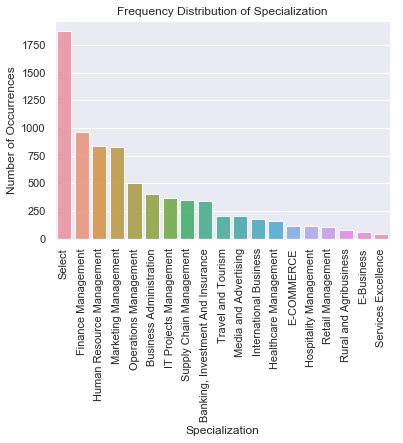

In [489]:
# Number of null values (Select) in Specialization column
spec_count = df_new['Specialization'].value_counts()
sns.set(style="darkgrid")
sns.barplot(spec_count.index, spec_count.values, alpha=0.9)
plt.title('Frequency Distribution of Specialization')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Specialization', fontsize=12)
plt.xticks(rotation=90)
plt.show()

We can see that maximum values are 'Select'. This means none of he above and it can't be used for analysis.

In [490]:
# We will convert the 'Selects' value into 'Nulls'

df_new['Specialization']=df_new['Specialization'].replace('Select',np.nan)
df_new['Specialization'].value_counts()

Finance Management                   962
Human Resource Management            838
Marketing Management                 824
Operations Management                500
Business Administration              399
IT Projects Management               366
Supply Chain Management              346
Banking, Investment And Insurance    335
Travel and Tourism                   202
Media and Advertising                202
International Business               176
Healthcare Management                157
E-COMMERCE                           111
Hospitality Management               111
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [491]:
# Check the % of Nulls after replacing Nulls
round(df_new['Specialization'].isnull().sum()/len(df_new['Specialization']),2)
# pd.set_option('display.max_columns', 100)
# df_new.head()

0.36

In [492]:
# Since the Nulls are > 30% we will drop the column Specialization 


df_new.drop('Specialization',axis =1, inplace =True)
df_new.shape

(9103, 30)

In [493]:
df_new['How did you hear about X Education'].value_counts()

Select                   4914
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [494]:
# We will convert the 'Selects' value into 'Nulls'

df_new['How did you hear about X Education']=df_new['How did you hear about X Education'].replace('Select',np.nan)
df_new['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              66
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [495]:
# Chk the Nulls for column 'How did you hear about X Education'

df_new['How did you hear about X Education'].isnull().sum()

7114

In [496]:
# Check the % of Nulls after replacing Nulls
round(df_new['How did you hear about X Education'].isnull().sum()/len(df_new['How did you hear about X Education']),2)

0.78

In [497]:
# Since the Nulls are > 30% we will drop the column Specialization 


df_new.drop('How did you hear about X Education',axis =1, inplace =True)
df_new.shape

(9103, 29)

In [498]:
# Check the Null values again 
df_new.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
What is your current occupation                  2683
What matters most to you in choosing a course    2702
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

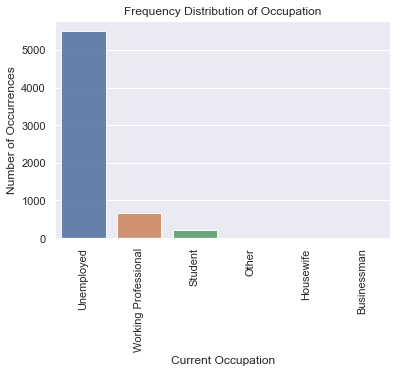

In [499]:
# chk the data discribution for columns 'What is your current occupation'

occ_count = df_new['What is your current occupation'].value_counts()
sns.set(style="darkgrid")
sns.barplot(occ_count.index, occ_count.values, alpha=0.9)
plt.title('Frequency Distribution of Occupation')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Current Occupation', fontsize=12)
plt.xticks(rotation=90)
plt.show()

- Based on the above distribution most of the customers selected Unemployed.

In [500]:
# Check the percentage of Nulls in the Current Occupation 

round(df_new['What is your current occupation'].isnull().sum()/len(df_new['What is your current occupation']),2)

0.29

In [501]:
df_new['What is your current occupation'].value_counts()

Unemployed              5502
Working Professional     679
Student                  207
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

- Since its 29% we will go ahead and drop this column, moreover 60% of the values are 'Unemployed' which does not add any business value in calcualted the Lead percentage

In [502]:
df_new.drop('What is your current occupation',axis=1, inplace=True)
df_new.shape

(9103, 28)

In [503]:
# Percentage of null fields so that we decide whether to impute them or drop those coluumns
round(df_new.isnull().sum()/len(df_new.isnull()),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Last Activity                                    0.00
Country                                          0.00
What matters most to you in choosing a course    0.30
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

- We will drop the columns 'What matters most to you in choosing a course'

In [504]:
df_new.drop('What matters most to you in choosing a course',axis=1, inplace=True)
df_new.shape

(9103, 27)

In [505]:
df_new['Lead Profile'].value_counts()

Select                         4079
Potential Lead                 1559
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [506]:
# We will convert 'Select' values to Nulls and calculate the Null % of the above column

df_new['Lead Profile']=df_new['Lead Profile'].replace('Select',np.nan)
df_new['Lead Profile'].value_counts()

Potential Lead                 1559
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [507]:
# Check the % of Nulls after replacing Nulls
round(df_new['Lead Profile'].isnull().sum()/len(df_new['Lead Profile']),2)

0.74

- Since 74% of the data are Null we will drop this column as it does not add value to the business

In [508]:
# Drop the Lead Profile column 

df_new.drop('Lead Profile', axis=1, inplace = True)
df_new.shape

(9103, 26)

In [509]:
# Percentage of null fields so that we decide whether to impute them or drop those coluumns
round(df_new.isnull().sum()/len(df_new.isnull()),2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.00
Total Time Spent on Website                 0.00
Page Views Per Visit                        0.00
Last Activity                               0.00
Country                                     0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply 

- We are left with only City column in dealing with Null values

In [510]:
df_new['City'].value_counts()

Mumbai                         3179
Select                         2181
Thane & Outskirts               746
Other Cities                    680
Other Cities of Maharashtra     447
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [511]:
# We will convert 'Select' values to Nulls and calculate the Null % of the above column

df_new['City']=df_new['City'].replace('Select',np.nan)
df_new['City'].value_counts()

Mumbai                         3179
Thane & Outskirts               746
Other Cities                    680
Other Cities of Maharashtra     447
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [512]:
# Check the % of Nulls after replacing Nulls
round(df_new['City'].isnull().sum()/len(df_new['City']),2)

0.4

- Since there are 40% Nulls we will drop the City column as to take up the Online course it doesnt matter which city the customers resides in

In [513]:
# Drop the City column
df_new.drop('City',axis =1, inplace =True)
df_new.shape

(9103, 25)

In [514]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 25 columns):
Prospect ID                                 9103 non-null object
Lead Number                                 9103 non-null int64
Lead Origin                                 9103 non-null object
Lead Source                                 9103 non-null object
Do Not Email                                9103 non-null object
Do Not Call                                 9103 non-null object
Converted                                   9103 non-null int64
TotalVisits                                 9103 non-null float64
Total Time Spent on Website                 9103 non-null int64
Page Views Per Visit                        9103 non-null float64
Last Activity                               9103 non-null object
Country                                     9103 non-null object
Search                                      9103 non-null object
Magazine                                    9103 

- Check the data on each columns to ensure data quality & if any changes to be made on the datatype conversions for business readabilty without change in their values


In [515]:
df_new.Converted.value_counts()

0    5642
1    3461
Name: Converted, dtype: int64

In [516]:
df_new['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2738
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      61
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [517]:
df_new.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


### Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [518]:
# Converting Binary variable values (Yes/No) to 1/0 respectively

In [519]:
#list of columns having binary values that need to be converted
binaryColumns = [
    'Do Not Email',
    'Do Not Call',
    'Search',
    'Magazine',
    'Newspaper Article',
    'X Education Forums',
    'Newspaper',
    'Digital Advertisement',
    'Through Recommendations',
    'Receive More Updates About Our Courses',
    'Update me on Supply Chain Content',
    'Get updates on DM Content',
    'I agree to pay the amount through cheque',
    'A free copy of Mastering The Interview'
]

In [520]:
for column in binaryColumns:
    df_new.loc[df_new[column] == 'Yes', column] = 1
    df_new.loc[df_new[column] == 'No', column] = 0

In [521]:
df_new.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,0,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,0,0,0,0,0,0,Modified


In [522]:
#creating dummy variables
df_new['Country'].value_counts()

India                   8816
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Canada                     4
South Africa               4
Nigeria                    4
Germany                    4
Sweden                     3
Uganda                     2
Philippines                2
Asia/Pacific Region        2
Italy                      2
China                      2
Belgium                    2
Netherlands                2
Bangladesh                 2
Ghana                      2
Malaysia                   1
Sri Lanka                  1
Kenya                      1
Vietnam                    1
Switzerland                1
Denmark                    1
Russia        

Since majority of the leads are from India, a dummy variable 'Lead from India' is created. 1 implies lead is from India, 0 implies lead is from elsewhere.

In [523]:
# Initializing column 'Lead from India' to 0
df_new['Lead from India'] = 0

# Setting 'Lead from India' to 1 for leads from India
df_new.loc[df_new['Country'] == 'India', 'Lead from India'] = 1

# Dropping column Country since it's derived into a new column
df_new.drop(columns=["Country"], axis=1, inplace=True)
df_new.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead from India
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,Modified,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,Email Opened,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,1,Email Opened,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,0,0,0,0,Modified,1
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,0,0,0,0,0,Modified,1


In [524]:
#dropping Prospect ID since they're just identifiers
df_new.drop(columns=["Prospect ID"], inplace=True)
df_new.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead from India
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,0,0,0,0,0,Modified,1
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,Email Opened,1
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,1,Email Opened,1
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,0,0,0,0,0,0,Modified,1
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,0,0,0,0,0,Modified,1


In [525]:
df_new.shape

(9103, 24)

In [526]:
# Finding columns that have 0 for all rows

df_binary = df_new[binaryColumns]
df_binary.head()

,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [527]:
df_binary.apply(pd.Series.value_counts)

,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,8379,9101,9089,9103.0,9101,9102,9102,9099,9096,9103.0,9103.0,9103.0,9103.0,6215
1,724,2,14,NaN,2,1,1,4,7,NaN,NaN,NaN,NaN,2888


We can see that 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', etc. have 0 for all rows. These columns can be dropped since there are of no significance.

In [528]:
df_new.drop(columns=["Magazine", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque"], inplace=True)

In [529]:
df_new.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,Lead from India
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,0,Modified,1
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0,Email Opened,1
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,1,Email Opened,1
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,0,Modified,1
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,0,Modified,1


In [530]:
df_new.shape

(9103, 19)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [531]:
# Check for rest of the catergorical variables to create dummies

df_new['Lead Origin'].value_counts()


Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

In [532]:
df_new['Lead Origin']=df_new['Lead Origin'].replace('Lead Add Form','Lead Import')
df_new['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3578
Lead Import                 639
Name: Lead Origin, dtype: int64

In [533]:

# Creating dummy variables for the variable 'MultipleLines'
lo = pd.get_dummies(df_new['Lead Origin'], prefix='Lead Origin')
# # Dropping MultipleLines_No phone service column
lo1 = lo.drop(['Lead Origin_Landing Page Submission'], 1)
# # #Adding the results to the master dataframe
df_new = pd.concat([df_new,lo1], axis=1)


In [534]:
# Clean up of the data Lead source 
df_new['Lead Source'].value_counts()

Google               2897
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
blog                    1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
NC_EDM                  1
youtubechannel          1
WeLearn                 1
Name: Lead Source, dtype: int64

In [535]:
# We will club together the few records and tidy up the data
df_new['Lead Source']=df_new['Lead Source'].replace('google','Google')
df_new['Lead Source']=df_new['Lead Source'].replace('Live Chat','Olark Chat')
df_new['Lead Source']=df_new['Lead Source'].replace('Referral Sites','Reference')
df_new['Lead Source']=df_new['Lead Source'].replace('Facebook','Social Media')
df_new['Lead Source']=df_new['Lead Source'].replace('bing','Social Media')
df_new['Lead Source']=df_new['Lead Source'].replace('Click2call','Social Media')
df_new['Lead Source']=df_new['Lead Source'].replace('Press_Release','Social Media')
df_new['Lead Source']=df_new['Lead Source'].replace('testone','Social Media')
df_new['Lead Source']=df_new['Lead Source'].replace('Pay per Click Ads','Social Media')
df_new['Lead Source']=df_new['Lead Source'].replace('WeLearn','Social Media')
df_new['Lead Source']=df_new['Lead Source'].replace('blog','Social Media')
df_new['Lead Source']=df_new['Lead Source'].replace('welearnblog_Home','Social Media')
df_new['Lead Source']=df_new['Lead Source'].replace('NC_EDM','Social Media')
df_new['Lead Source']=df_new['Lead Source'].replace('youtubechannel','Social Media')
df_new['Lead Source']=df_new['Lead Source'].replace('Welingak Website','Social Media')
df_new['Lead Source']=df_new['Lead Source'].replace('Organic Search','Social Media')

df_new['Lead Source'].value_counts()

Google            2902
Direct Traffic    2543
Olark Chat        1755
Social Media      1335
Reference          568
Name: Lead Source, dtype: int64

In [536]:
# Creating dummy variables for the variable 'Lead source'. 
LS = pd.get_dummies(df_new['Lead Source'], prefix='Lead Source')
LS1 = LS.drop(['Lead Source_Direct Traffic'], 1)
# # Adding the results to the master dataframe
df_new = pd.concat([df_new,LS1], axis=1)
LS1.head()
            

,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Social Media
0,0,1,0,0
1,0,0,0,1
2,0,0,0,0
3,0,0,0,0
4,1,0,0,0


In [537]:
# Drop the features Lead Origin & Lead source after adding Dummies
df_new.drop(['Lead Origin', 'Lead Source'], axis=1, inplace=True)
df_new.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,...,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,Lead from India,Lead Origin_API,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Social Media
0,660737,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,...,0,0,Modified,1,1,0,0,1,0,0
1,660728,0,0,0,5.0,674,2.5,Email Opened,0,0,...,0,0,Email Opened,1,1,0,0,0,0,1
2,660727,0,0,1,2.0,1532,2.0,Email Opened,0,0,...,0,1,Email Opened,1,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,Unreachable,0,0,...,0,0,Modified,1,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,...,0,0,Modified,1,0,0,1,0,0,0


In [538]:
df_new['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2738
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      61
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [539]:
# We will club together the few records and tidy up the data
df_new['Last Activity']=df_new['Last Activity'].replace('Email Marked Spam','Unreachable')
df_new['Last Activity']=df_new['Last Activity'].replace('Email Bounced','Unreachable')
df_new['Last Activity']=df_new['Last Activity'].replace('Unsubscribed','Unreachable')
df_new['Last Activity']=df_new['Last Activity'].replace('Resubscribed to emails','Email Link Clicked')
df_new['Last Activity']=df_new['Last Activity'].replace('Had a Phone Conversation','SMS Sent')
df_new['Last Activity']=df_new['Last Activity'].replace('View in browser link Clicked','Page Visited on Website')
df_new['Last Activity']=df_new['Last Activity'].replace('Visited Booth in Tradeshow','Page Visited on Website')
df_new['Last Activity']=df_new['Last Activity'].replace('Email Received','Page Visited on Website')
df_new['Last Activity']=df_new['Last Activity'].replace('Email Link Clicked','Email Opened')
df_new['Last Activity']=df_new['Last Activity'].replace('Visited Booth in Tradeshow','Olark Chat Conversation')
df_new['Last Activity']=df_new['Last Activity'].replace('Approached upfront','Olark Chat Conversation')

df_new['Last Activity'].value_counts()

Email Opened                 3705
SMS Sent                     2763
Olark Chat Conversation       977
Page Visited on Website       649
Unreachable                   465
Converted to Lead             428
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [540]:
# Creating dummy variables for the variable 'Last Activity'. 
La = pd.get_dummies(df_new['Last Activity'], prefix='Last_Activity')
La.head()
La1 = La.drop(['Last_Activity_Form Submitted on Website'], 1)
# # # Adding the results to the master dataframe
df_new = pd.concat([df_new,La1], axis=1)
La1.head()
            

,Last_Activity_Converted to Lead,Last_Activity_Email Opened,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,0,1
4,1,0,0,0,0,0


In [541]:
# Drop the features Lead Origin & Lead source after adding Dummies
df_new.drop(['Last Activity'], axis=1, inplace=True)
df_new.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,...,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Social Media,Last_Activity_Converted to Lead,Last_Activity_Email Opened,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,660681,0,0,1,2.0,1428,1.0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [542]:
df_new['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
View in browser link Clicked       1
Approached upfront                 1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [543]:
# We will club together the few records and tidy up the data
df_new['Last Notable Activity']=df_new['Last Notable Activity'].replace('Email Link Clicked','Email Opened')
df_new['Last Notable Activity']=df_new['Last Notable Activity'].replace('Email Bounced','Others')
df_new['Last Notable Activity']=df_new['Last Notable Activity'].replace('Unsubscribed','Others')
df_new['Last Notable Activity']=df_new['Last Notable Activity'].replace('Unreachable','Others')
df_new['Last Notable Activity']=df_new['Last Notable Activity'].replace('Had a Phone Conversation','Others')
df_new['Last Notable Activity']=df_new['Last Notable Activity'].replace('View in browser link Clicked','Page Visited on Website')
df_new['Last Notable Activity']=df_new['Last Notable Activity'].replace('Email Marked Spam','Others')
df_new['Last Notable Activity']=df_new['Last Notable Activity'].replace('Email Received','Others')
df_new['Last Notable Activity']=df_new['Last Notable Activity'].replace('Email Link Clicked','Email Opened')
df_new['Last Notable Activity']=df_new['Last Notable Activity'].replace('Approached upfront','Olark Chat Conversation')
df_new['Last Notable Activity']=df_new['Last Notable Activity'].replace('Resubscribed to emails','Others')
df_new['Last Notable Activity']=df_new['Last Notable Activity'].replace('Form Submitted on Website','Others')


df_new['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               3000
SMS Sent                   2172
Page Visited on Website     319
Olark Chat Conversation     184
Others                      158
Name: Last Notable Activity, dtype: int64

In [544]:
# Creating dummy variables for the variable 'Last Activity'. 
Ln = pd.get_dummies(df_new['Last Notable Activity'], prefix='Last_Notable_Act')
Ln1 = Ln.drop(['Last_Notable_Act_Olark Chat Conversation'], 1)
# # Adding the results to the master dataframe
df_new = pd.concat([df_new,Ln1], axis=1)
Ln1.head()
            

,Last_Notable_Act_Email Opened,Last_Notable_Act_Modified,Last_Notable_Act_Others,Last_Notable_Act_Page Visited on Website,Last_Notable_Act_SMS Sent
0,0,1,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [545]:
# Drop the features Lead Origin & Lead source after adding Dummies
df_new.drop(['Last Notable Activity'], axis=1, inplace=True)
df_new.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,...,Last_Activity_Email Opened,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Notable_Act_Email Opened,Last_Notable_Act_Modified,Last_Notable_Act_Others,Last_Notable_Act_Page Visited on Website,Last_Notable_Act_SMS Sent
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [546]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 32 columns):
Lead Number                                 9103 non-null int64
Do Not Email                                9103 non-null int64
Do Not Call                                 9103 non-null int64
Converted                                   9103 non-null int64
TotalVisits                                 9103 non-null float64
Total Time Spent on Website                 9103 non-null int64
Page Views Per Visit                        9103 non-null float64
Search                                      9103 non-null int64
Newspaper Article                           9103 non-null int64
X Education Forums                          9103 non-null int64
Newspaper                                   9103 non-null int64
Digital Advertisement                       9103 non-null int64
Through Recommendations                     9103 non-null int64
A free copy of Mastering The Interview      9103 non-null

- Now you can see that you have all variables as numeric.

#### Checking for Outliers

In [547]:
# Checking for outliers in the continuous variables
num_edu =  df_new[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [548]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_edu.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.445238,481.350104,2.362820
std,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,244.000000,2.000000
75%,5.000000,919.500000,3.000000
90%,7.000000,1372.000000,5.000000
95%,10.000000,1556.900000,6.000000
99%,17.000000,1838.960000,9.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x22c2aa38c88>,
 'caps': [<matplotlib.lines.Line2D at 0x22c2d005198>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c2cd85c18>],
 'medians': [<matplotlib.lines.Line2D at 0x22c2cf202e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c2cdc89b0>],
 'means': []}

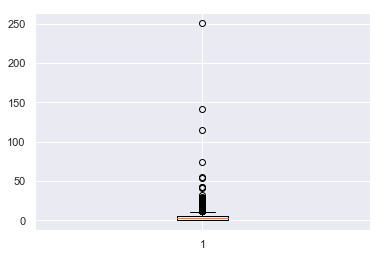

In [549]:
# 1. outlier treatment

plt.boxplot(num_edu['TotalVisits'])




{'whiskers': [<matplotlib.lines.Line2D at 0x22c2cf4b4a8>,
 'caps': [<matplotlib.lines.Line2D at 0x22c2cf4bbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c2cf4b0f0>],
 'medians': [<matplotlib.lines.Line2D at 0x22c2cf63fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c2cf63748>],
 'means': []}

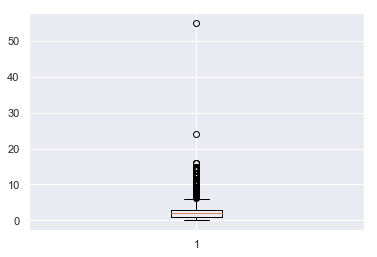

In [550]:
plt.boxplot(num_edu['Page Views Per Visit'])


{'whiskers': [<matplotlib.lines.Line2D at 0x22c2cc4a208>,
 'caps': [<matplotlib.lines.Line2D at 0x22c2cc34470>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c2ccbcbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x22c2cf7b2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c2cf7bc50>],
 'means': []}

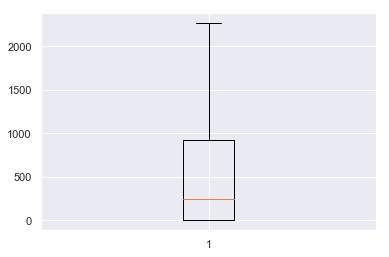

In [551]:
plt.boxplot(num_edu['Total Time Spent on Website'])

- Based on the distributions above we see there are outliers for features 'TotalVisits' & 'Page views per visit'  and not for 'Total time spent on website'.

In [552]:
# removing (statistical) outliers

Q1 = df_new['Page Views Per Visit'].quantile(0.05)
Q3 = df_new['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
df_new = df_new[(df_new['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (df_new['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

# outlier treatment for TotalVisits
Q1 = df_new['TotalVisits'].quantile(0.05)
Q3 = df_new['TotalVisits'].quantile(0.95)
IQR = Q3 - Q1
df_new = df_new[(df_new['TotalVisits'] >= Q1 - 1.5*IQR) & (df_new['TotalVisits'] <= Q3 + 1.5*IQR)]



In [553]:
df_new.shape

(9077, 32)

In [554]:
# Plot heatmap and correlation matrix
df_corr = df_new.corr()
df_corr.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,...,Last_Activity_Email Opened,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Notable_Act_Email Opened,Last_Notable_Act_Modified,Last_Notable_Act_Others,Last_Notable_Act_Page Visited on Website,Last_Notable_Act_SMS Sent
Lead Number,1.000000,-0.099637,0.012144,0.023491,0.040873,0.019137,0.060348,-0.012683,-0.012346,-0.003126,...,0.112833,0.003252,0.015199,-0.136644,-0.010009,0.086259,0.072604,-0.000037,0.004778,-0.168863
Do Not Email,-0.099637,1.000000,-0.004338,-0.135445,-0.003051,-0.048318,0.018198,-0.011484,-0.004338,-0.003067,...,-0.232276,-0.055183,0.069246,-0.016104,0.618912,-0.197106,0.119830,0.305316,0.041702,-0.024652
Do Not Call,0.012144,-0.004338,1.000000,0.018942,0.005334,0.007066,-0.006101,-0.000583,-0.000220,-0.000156,...,0.002798,0.018808,-0.004068,-0.009813,-0.003450,-0.010412,0.019826,-0.001976,-0.002796,-0.008321
Converted,0.023491,-0.135445,0.018942,1.000000,0.048948,0.355315,0.000231,-0.001893,0.003653,-0.008227,...,-0.037947,-0.206848,-0.081235,0.342706,-0.117275,-0.025052,-0.264320,0.003258,-0.035355,0.362443
TotalVisits,0.040873,-0.003051,0.005334,0.048948,1.000000,0.330813,0.690456,0.074672,0.050431,0.053196,...,0.039007,-0.194105,0.235271,0.014135,-0.035300,0.062459,-0.144090,0.012762,0.223784,0.010239


## Train - Test Split

In [555]:
from sklearn.model_selection import train_test_split

In [556]:
# Putting feature variable to X
X = df_new.drop(['Lead Number','Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last_Activity_Email Opened,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Notable_Act_Email Opened,Last_Notable_Act_Modified,Last_Notable_Act_Others,Last_Notable_Act_Page Visited on Website,Last_Notable_Act_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [557]:
# Putting response variable to y
y = df_new['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [558]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [559]:
from sklearn.preprocessing import StandardScaler

In [560]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last_Activity_Email Opened,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Notable_Act_Email Opened,Last_Notable_Act_Modified,Last_Notable_Act_Others,Last_Notable_Act_Page Visited on Website,Last_Notable_Act_SMS Sent
7856,0,0,1.404951,0.298091,-0.169112,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2257,0,0,0.199352,-0.246342,0.803807,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
851,0,0,-0.403448,1.217742,-0.655572,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7141,1,0,-1.006248,-0.882741,-1.142032,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6337,0,0,-0.403448,0.000124,-0.169112,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [561]:
### Checking the lead Converstion Rate
lead_convert = (sum(df_new['Converted'])/len(df_new['Converted'].index))*100
lead_convert

38.05221989644156

- We have almost 38% of Lead converstion rate

### Looking at Correlations

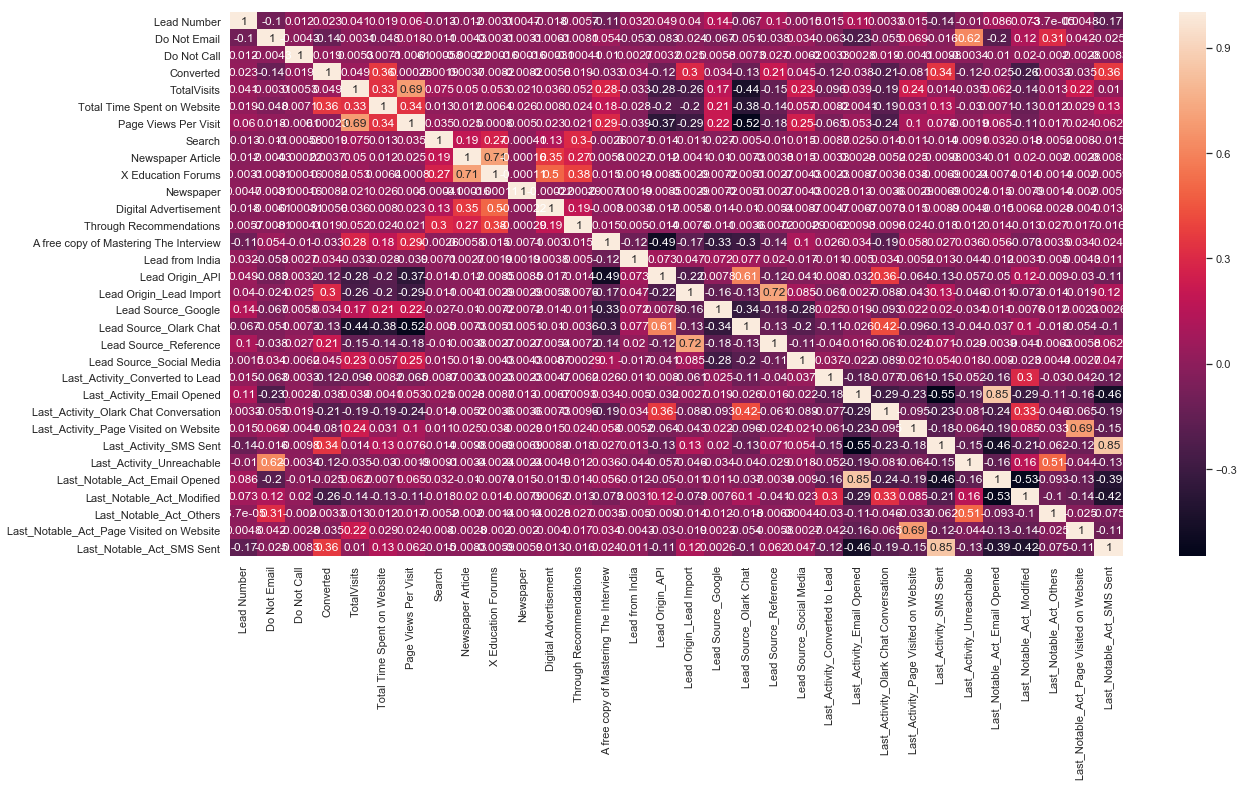

In [562]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_new.corr(),annot = True)
plt.show()

*** There are many categorical variables which are mulitcolinear we will not treate them now as RFE will take care of them.

In [563]:
X_train.shape

(6353, 30)

### Model Building
Let's start by splitting our data into a training set and a test set.

In [564]:
# Import the necessary libraries
import statsmodels.api as sm

In [565]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6353
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2808.0
Date:                Mon, 18 Nov 2019   Deviance:                       5616.0
Time:                        22:36:00   Pearson chi2:                 6.48e+03
No. Iterations:                    20   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.2638      0.516     -4.387      0.000      -3.275      -1.252
Do Not Email                                -1.4890      0.185     -8.037      0.000      -1.852      -1.126
Do Not Call                                 20.6791   2.03e+04      0.001      0.999   -3.97e+04    3.97e+04
TotalVisits                                  0.3436      0.049      6.979      0.000       0.247       0.440
Total Time Spent on Website                  1.1143      0.039     28.361      0.000       1.037       1.191
Page Views Per Visit                        -0.2626      0.052     -5.005      0.000      -0.366      -0.160
Search                                       0.4411      0.901      0.489      0.625      -1.325       2.208
Newspaper Article                           22.0925   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
X Education Forums                       -1.137e-10   2.31e-07     -0.000      1.000   -4.52e-07    4.52e-07
Newspaper                                -7.362e-11   6.07e-07     -0.000      1.000   -1.19e-06    1.19e-06
Digital Advertisement                       -0.5227      1.265     -0.413      0.680      -3.002       1.957
Through Recommendations                      2.1903      1.231      1.779      0.075      -0.223       4.603
A free copy of Mastering The Interview      -0.0285      0.102     -0.280      0.779      -0.228       0.171
Lead from India                              0.1597      0.199      0.804      0.422      -0.230       0.549
Lead Origin_API                              0.0077      0.102      0.075      0.940      -0.192       0.208
Lead Origin_Lead Import                      3.9327      0.265     14.839      0.000       3.413       4.452
Lead Source_Google                           0.3516      0.109      3.224      0.001       0.138       0.565
Lead Source_Olark Chat                       1.3528      0.155      8.729      0.000       1.049       1.657
Lead Source_Reference                        0.4193      0.247      1.694      0.090      -0.066       0.904
Lead Source_Social Media                     0.2206      0.122      1.804      0.071      -0.019       0.460
Last_Activity_Converted to Lead             -0.3371      0.366     -0.920      0.358      -1.055       0.381
Last_Activity_Email Opened                   0.3533      0.332      1.064      0.288      -0.298       1.004
Last_Activity_Olark Chat Conversation       -0.8997      0.352     -2.553      0.011      -1.590      -0.209
Last_Activity_Page Visited on Website       -0.1924      0.370     -0.519      0.603      -0.918       0.534
Last_Activity_SMS Sent                       0.6145      0.335      1.832      0.067      -0.043       1.272
Last_Activity_Unreachable                   -0.4089      0.437     -0.935      0.350      -1.266       0.448
L

### Feature Selection Using RFE

In [566]:
# Import necessary logistic regression libraries
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [567]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [568]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True, False, False, False,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True, False, False,  True,
        True,  True,  True])

In [569]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', True, 1),
 ('Newspaper Article', True, 1),
 ('X Education Forums', False, 10),
 ('Newspaper', False, 11),
 ('Digital Advertisement', False, 5),
 ('Through Recommendations', True, 1),
 ('A free copy of Mastering The Interview', False, 7),
 ('Lead from India', False, 6),
 ('Lead Origin_API', False, 8),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Social Media', False, 4),
 ('Last_Activity_Converted to Lead', True, 1),
 ('Last_Activity_Email Opened', True, 1),
 ('Last_Activity_Olark Chat Conversation', True, 1),
 ('Last_Activity_Page Visited on Website', False, 3),
 ('Last_Activity_SMS Sent', True, 1),
 ('Last_Activity_Unreachable', False, 2),
 ('Last_Notable_Act_Email Opened', False, 9),
 ('Last_Notabl

In [570]:
col = X_train.columns[rfe.support_]

In [571]:
X_train.columns[~rfe.support_]

Index(['X Education Forums', 'Newspaper', 'Digital Advertisement',
       'A free copy of Mastering The Interview', 'Lead from India',
       'Lead Origin_API', 'Lead Source_Social Media',
       'Last_Activity_Page Visited on Website', 'Last_Activity_Unreachable',
       'Last_Notable_Act_Email Opened'],
      dtype='object')

##### Assessing the model with StatsModels

In [572]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6353
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2811.8
Date:                Mon, 18 Nov 2019   Deviance:                       5623.7
Time:                        22:36:01   Pearson chi2:                 6.50e+03
No. Iterations:                    20   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.8819      0.198     -9.513      0.000      -2.270      -1.494
Do Not Email                                -1.5355      0.177     -8.658      0.000      -1.883      -1.188
Do Not Call                                 20.6949   2.02e+04      0.001      0.999   -3.95e+04    3.95e+04
TotalVisits                                  0.3530      0.049      7.277      0.000       0.258       0.448
Total Time Spent on Website                  1.1093      0.039     28.329      0.000       1.033       1.186
Page Views Per Visit                        -0.2499      0.051     -4.916      0.000      -0.350      -0.150
Search                                       0.4397      0.904      0.486      0.627      -1.333       2.212
Newspaper Article                           22.1737   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Through Recommendations                      2.1400      1.228      1.743      0.081      -0.267       4.547
Lead Origin_Lead Import                      4.0573      0.241     16.822      0.000       3.585       4.530
Lead Source_Google                           0.3059      0.077      3.961      0.000       0.155       0.457
Lead Source_Olark Chat                       1.3374      0.127     10.526      0.000       1.088       1.586
Lead Source_Reference                        0.2998      0.228      1.314      0.189      -0.148       0.747
Last_Activity_Converted to Lead             -0.1200      0.245     -0.490      0.624      -0.600       0.360
Last_Activity_Email Opened                   0.6032      0.186      3.250      0.001       0.239       0.967
Last_Activity_Olark Chat Conversation       -0.7748      0.213     -3.638      0.000      -1.192      -0.357
Last_Activity_SMS Sent                       0.8247      0.192      4.299      0.000       0.449       1.201
Last_Notable_Act_Modified                   -0.1939      0.118     -1.645      0.100      -0.425       0.037
Last_Notable_Act_Others                      1.7440      0.308      5.665      0.000       1.141       2.347
Last_Notable_Act_Page Visited on Website    -0.2732      0.274     -0.996      0.319      -0.811       0.264
Last_Notable_Act_SMS Sent                    1.3157      0.183      7.174      0.000       0.956       1.675
============================================================================================================
"""

In [573]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7856    0.398973
2257    0.172162
851     0.598567
7141    0.019765
6337    0.201217
3684    0.204073
377     0.567263
2919    0.088848
1013    0.595196
4292    0.450744
dtype: float64

In [574]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.39897259, 0.17216164, 0.59856689, 0.0197646 , 0.20121704,
       0.2040725 , 0.56726256, 0.08884786, 0.59519627, 0.450744  ])

##### Creating a dataframe with the actual Lead Convertion rate and the predicted probabilities

In [575]:
y_train_pred_final = pd.DataFrame({'Lead_Convertion':y_train.values, 'Lead_Convertion_prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Lead_Convertion,Lead_Convertion_prob,LeadID
0,1,0.398973,7856
1,0,0.172162,2257
2,1,0.598567,851
3,0,0.019765,7141
4,0,0.201217,6337


##### Creating new column 'predicted' with 1 if Lead_Convertion_prob > 0.5 else 0

In [576]:
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Convertion_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's view the data
y_train_pred_final.head()

,Lead_Convertion,Lead_Convertion_prob,LeadID,predicted
0,1,0.398973,7856,0
1,0,0.172162,2257,0
2,1,0.598567,851,1
3,0,0.019765,7141,0
4,0,0.201217,6337,0


In [577]:
# import necessary Confusion matrix libraries
from sklearn import metrics

In [578]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead_Convertion, y_train_pred_final.predicted )
print(confusion)

[[3407  507]
 [ 769 1670]]


In [579]:
# Predicted        not_Converted    Converted
# Actual
# not_Converted        3399         515
# Converted            794          1645  

In [580]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Lead_Convertion, y_train_pred_final.predicted))

0.7991500078702976


- The overall Accuracy is ~ 79% 

#### Checking VIFs

In [581]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [582]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last_Activity_SMS Sent,6.85
19,Last_Notable_Act_SMS Sent,6.44
10,Lead Source_Olark Chat,2.76
8,Lead Origin_Lead Import,2.67
16,Last_Notable_Act_Modified,2.59
4,Page Views Per Visit,2.43
11,Lead Source_Reference,2.21
2,TotalVisits,2.18
14,Last_Activity_Olark Chat Conversation,1.88
13,Last_Activity_Email Opened,1.75


#### Based on the p-values score the 'Do not call' column has high values so we will drop and re build the model

In [583]:
col = col.drop('Do Not Call', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'Newspaper Article',
       'Through Recommendations', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last_Activity_Converted to Lead', 'Last_Activity_Email Opened',
       'Last_Activity_Olark Chat Conversation', 'Last_Activity_SMS Sent',
       'Last_Notable_Act_Modified', 'Last_Notable_Act_Others',
       'Last_Notable_Act_Page Visited on Website',
       'Last_Notable_Act_SMS Sent'],
      dtype='object')

In [584]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6353
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2812.5
Date:                Mon, 18 Nov 2019   Deviance:                       5625.1
Time:                        22:36:01   Pearson chi2:                 6.51e+03
No. Iterations:                    19   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.8862      0.198     -9.538      0.000      -2.274      -1.499
Do Not Email                                -1.5363      0.177     -8.658      0.000      -1.884      -1.189
TotalVisits                                  0.3537      0.049      7.292      0.000       0.259       0.449
Total Time Spent on Website                  1.1096      0.039     28.342      0.000       1.033       1.186
Page Views Per Visit                        -0.2502      0.051     -4.922      0.000      -0.350      -0.151
Search                                       0.4401      0.904      0.487      0.626      -1.332       2.213
Newspaper Article                           21.1709   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Through Recommendations                      2.1405      1.228      1.743      0.081      -0.267       4.548
Lead Origin_Lead Import                      4.0651      0.241     16.840      0.000       3.592       4.538
Lead Source_Google                           0.3066      0.077      3.970      0.000       0.155       0.458
Lead Source_Olark Chat                       1.3368      0.127     10.523      0.000       1.088       1.586
Lead Source_Reference                        0.3068      0.228      1.344      0.179      -0.141       0.754
Last_Activity_Converted to Lead             -0.1194      0.245     -0.487      0.626      -0.600       0.361
Last_Activity_Email Opened                   0.6066      0.186      3.269      0.001       0.243       0.970
Last_Activity_Olark Chat Conversation       -0.7654      0.212     -3.602      0.000      -1.182      -0.349
Last_Activity_SMS Sent                       0.8242      0.192      4.295      0.000       0.448       1.200
Last_Notable_Act_Modified                   -0.1905      0.118     -1.618      0.106      -0.421       0.040
Last_Notable_Act_Others                      1.7481      0.308      5.678      0.000       1.145       2.352
Last_Notable_Act_Page Visited on Website    -0.2704      0.274     -0.986      0.324      -0.808       0.267
Last_Notable_Act_SMS Sent                    1.3201      0.183      7.199      0.000       0.961       1.679
============================================================================================================
"""

In [585]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [586]:
y_train_pred[:10]

array([0.39898745, 0.17256557, 0.59858066, 0.01982606, 0.20103026,
       0.20394954, 0.5670651 , 0.08874242, 0.59515098, 0.4507755 ])

In [587]:
y_train_pred_final['Lead_Convertion_prob'] = y_train_pred

In [588]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Convertion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead_Convertion,Lead_Convertion_prob,LeadID,predicted
0,1,0.398987,7856,0
1,0,0.172566,2257,0
2,1,0.598581,851,1
3,0,0.019826,7141,0
4,0,0.201030,6337,0


In [589]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Lead_Convertion, y_train_pred_final.predicted))

0.7991500078702976


- The overall accuracy is still the same

##### Let's check the VIFs again

In [590]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last_Activity_SMS Sent,6.85
18,Last_Notable_Act_SMS Sent,6.44
9,Lead Source_Olark Chat,2.76
7,Lead Origin_Lead Import,2.67
15,Last_Notable_Act_Modified,2.59
3,Page Views Per Visit,2.43
10,Lead Source_Reference,2.21
1,TotalVisits,2.18
13,Last_Activity_Olark Chat Conversation,1.88
12,Last_Activity_Email Opened,1.75


Since the p-values of 'Newspaper Article' is higher we will drop that feature and check the VIF again

In [591]:
col = col.drop('Newspaper Article', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'Through Recommendations',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last_Activity_Converted to Lead', 'Last_Activity_Email Opened',
       'Last_Activity_Olark Chat Conversation', 'Last_Activity_SMS Sent',
       'Last_Notable_Act_Modified', 'Last_Notable_Act_Others',
       'Last_Notable_Act_Page Visited on Website',
       'Last_Notable_Act_SMS Sent'],
      dtype='object')

In [592]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6353
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2813.6
Date:                Mon, 18 Nov 2019   Deviance:                       5627.2
Time:                        22:36:02   Pearson chi2:                 6.51e+03
No. Iterations:                     6   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.8943      0.198     -9.585      0.000      -2.282      -1.507
Do Not Email                                -1.5363      0.177     -8.659      0.000      -1.884      -1.189
TotalVisits                                  0.3535      0.048      7.289      0.000       0.258       0.449
Total Time Spent on Website                  1.1099      0.039     28.350      0.000       1.033       1.187
Page Views Per Visit                        -0.2468      0.051     -4.863      0.000      -0.346      -0.147
Search                                       0.4390      0.904      0.485      0.627      -1.334       2.212
Through Recommendations                      2.1407      1.228      1.743      0.081      -0.267       4.548
Lead Origin_Lead Import                      4.0697      0.241     16.858      0.000       3.597       4.543
Lead Source_Google                           0.3051      0.077      3.951      0.000       0.154       0.456
Lead Source_Olark Chat                       1.3401      0.127     10.550      0.000       1.091       1.589
Lead Source_Reference                        0.3048      0.228      1.336      0.182      -0.142       0.752
Last_Activity_Converted to Lead             -0.1174      0.245     -0.479      0.632      -0.598       0.363
Last_Activity_Email Opened                   0.6143      0.185      3.313      0.001       0.251       0.978
Last_Activity_Olark Chat Conversation       -0.7625      0.212     -3.589      0.000      -1.179      -0.346
Last_Activity_SMS Sent                       0.8243      0.192      4.295      0.000       0.448       1.200
Last_Notable_Act_Modified                   -0.1830      0.118     -1.556      0.120      -0.413       0.047
Last_Notable_Act_Others                      1.7557      0.308      5.704      0.000       1.152       2.359
Last_Notable_Act_Page Visited on Website    -0.2625      0.274     -0.957      0.338      -0.800       0.275
Last_Notable_Act_SMS Sent                    1.3273      0.183      7.243      0.000       0.968       1.686
============================================================================================================
"""

All variables have a good p-values except 2. So we need not drop any more variables and we can proceed with making predictions using this model only.



In [593]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [594]:
y_train_pred[:10]

array([0.398734  , 0.17375647, 0.59770178, 0.01970944, 0.20089289,
       0.20391157, 0.56686028, 0.08931301, 0.59481269, 0.44982383])

In [595]:
y_train_pred_final['Lead_Convertion_prob'] = y_train_pred

In [596]:
# Creating new column 'predicted' with 1 if Lead_Convertion_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Convertion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead_Convertion,Lead_Convertion_prob,LeadID,predicted
0,1,0.398734,7856,0
1,0,0.173756,2257,0
2,1,0.597702,851,1
3,0,0.019709,7141,0
4,0,0.200893,6337,0


In [597]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead_Convertion, y_train_pred_final.predicted )
confusion

array([[3407,  507],
       [ 768, 1671]], dtype=int64)

In [598]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Lead_Convertion, y_train_pred_final.predicted)

0.7993074138202424

- Still the accuracy is same

In [599]:
# Lets drop the Search column and rebuild the model
col = col.drop('Search', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Through Recommendations',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last_Activity_Converted to Lead', 'Last_Activity_Email Opened',
       'Last_Activity_Olark Chat Conversation', 'Last_Activity_SMS Sent',
       'Last_Notable_Act_Modified', 'Last_Notable_Act_Others',
       'Last_Notable_Act_Page Visited on Website',
       'Last_Notable_Act_SMS Sent'],
      dtype='object')

In [600]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res5 = logm5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6353
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2813.7
Date:                Mon, 18 Nov 2019   Deviance:                       5627.4
Time:                        22:36:02   Pearson chi2:                 6.51e+03
No. Iterations:                     6   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.8934      0.198     -9.581      0.000      -2.281      -1.506
Do Not Email                                -1.5366      0.177     -8.661      0.000      -1.884      -1.189
TotalVisits                                  0.3546      0.048      7.318      0.000       0.260       0.450
Total Time Spent on Website                  1.1098      0.039     28.348      0.000       1.033       1.187
Page Views Per Visit                        -0.2472      0.051     -4.871      0.000      -0.347      -0.148
Through Recommendations                      2.2804      1.205      1.892      0.059      -0.082       4.643
Lead Origin_Lead Import                      4.0697      0.241     16.857      0.000       3.597       4.543
Lead Source_Google                           0.3041      0.077      3.940      0.000       0.153       0.455
Lead Source_Olark Chat                       1.3403      0.127     10.554      0.000       1.091       1.589
Lead Source_Reference                        0.3042      0.228      1.333      0.183      -0.143       0.751
Last_Activity_Converted to Lead             -0.1171      0.245     -0.478      0.633      -0.598       0.363
Last_Activity_Email Opened                   0.6145      0.185      3.314      0.001       0.251       0.978
Last_Activity_Olark Chat Conversation       -0.7628      0.212     -3.590      0.000      -1.179      -0.346
Last_Activity_SMS Sent                       0.8261      0.192      4.305      0.000       0.450       1.202
Last_Notable_Act_Modified                   -0.1835      0.118     -1.561      0.119      -0.414       0.047
Last_Notable_Act_Others                      1.7550      0.308      5.701      0.000       1.152       2.358
Last_Notable_Act_Page Visited on Website    -0.2622      0.274     -0.956      0.339      -0.800       0.275
Last_Notable_Act_SMS Sent                    1.3250      0.183      7.234      0.000       0.966       1.684
============================================================================================================
"""

In [601]:
##### Let's now check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last_Activity_SMS Sent,6.84
16,Last_Notable_Act_SMS Sent,6.44
7,Lead Source_Olark Chat,2.75
5,Lead Origin_Lead Import,2.67
13,Last_Notable_Act_Modified,2.59
3,Page Views Per Visit,2.42
8,Lead Source_Reference,2.21
1,TotalVisits,2.18
11,Last_Activity_Olark Chat Conversation,1.88
10,Last_Activity_Email Opened,1.75


Since the P-values of column - ' Last_Activity_Converted to Lead ' is high we will drop it and rerun the model again

In [602]:
col = col.drop('Last_Activity_Converted to Lead', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Through Recommendations',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last_Activity_Email Opened', 'Last_Activity_Olark Chat Conversation',
       'Last_Activity_SMS Sent', 'Last_Notable_Act_Modified',
       'Last_Notable_Act_Others', 'Last_Notable_Act_Page Visited on Website',
       'Last_Notable_Act_SMS Sent'],
      dtype='object')

In [603]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res6 = logm6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6353
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2813.8
Date:                Mon, 18 Nov 2019   Deviance:                       5627.6
Time:                        22:36:02   Pearson chi2:                 6.51e+03
No. Iterations:                     6   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9413      0.171    -11.351      0.000      -2.277      -1.606
Do Not Email                                -1.5251      0.176     -8.662      0.000      -1.870      -1.180
TotalVisits                                  0.3568      0.048      7.394      0.000       0.262       0.451
Total Time Spent on Website                  1.1102      0.039     28.361      0.000       1.033       1.187
Page Views Per Visit                        -0.2458      0.051     -4.850      0.000      -0.345      -0.146
Through Recommendations                      2.2821      1.205      1.893      0.058      -0.081       4.645
Lead Origin_Lead Import                      4.0764      0.241     16.913      0.000       3.604       4.549
Lead Source_Google                           0.3063      0.077      3.975      0.000       0.155       0.457
Lead Source_Olark Chat                       1.3480      0.126     10.698      0.000       1.101       1.595
Lead Source_Reference                        0.3063      0.228      1.342      0.179      -0.141       0.754
Last_Activity_Email Opened                   0.6593      0.161      4.103      0.000       0.344       0.974
Last_Activity_Olark Chat Conversation       -0.7188      0.192     -3.743      0.000      -1.095      -0.342
Last_Activity_SMS Sent                       0.8694      0.170      5.121      0.000       0.537       1.202
Last_Notable_Act_Modified                   -0.1834      0.118     -1.559      0.119      -0.414       0.047
Last_Notable_Act_Others                      1.7882      0.301      5.950      0.000       1.199       2.377
Last_Notable_Act_Page Visited on Website    -0.2205      0.260     -0.847      0.397      -0.731       0.290
Last_Notable_Act_SMS Sent                    1.3262      0.183      7.239      0.000       0.967       1.685
============================================================================================================
"""

In [604]:
##### Let's now check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last_Activity_SMS Sent,6.42
15,Last_Notable_Act_SMS Sent,6.05
7,Lead Source_Olark Chat,2.74
5,Lead Origin_Lead Import,2.66
3,Page Views Per Visit,2.41
8,Lead Source_Reference,2.21
1,TotalVisits,2.17
12,Last_Notable_Act_Modified,2.01
10,Last_Activity_Olark Chat Conversation,1.78
6,Lead Source_Google,1.74


In [605]:
# Since the p-value of Last_Notable_Act_Page Visited on Website is high we will drop and rerun the model
col = col.drop('Last_Notable_Act_Page Visited on Website', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Through Recommendations',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last_Activity_Email Opened', 'Last_Activity_Olark Chat Conversation',
       'Last_Activity_SMS Sent', 'Last_Notable_Act_Modified',
       'Last_Notable_Act_Others', 'Last_Notable_Act_SMS Sent'],
      dtype='object')

In [606]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res7 = logm7.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6353
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2814.2
Date:                Mon, 18 Nov 2019   Deviance:                       5628.4
Time:                        22:36:02   Pearson chi2:                 6.51e+03
No. Iterations:                     6   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.0290      0.137    -14.844      0.000      -2.297      -1.761
Do Not Email                             -1.5186      0.176     -8.629      0.000      -1.864      -1.174
TotalVisits                               0.3464      0.047      7.446      0.000       0.255       0.438
Total Time Spent on Website               1.1101      0.039     28.356      0.000       1.033       1.187
Page Views Per Visit                     -0.2407      0.050     -4.787      0.000      -0.339      -0.142
Through Recommendations                   2.2655      1.209      1.874      0.061      -0.104       4.635
Lead Origin_Lead Import                   4.0663      0.241     16.896      0.000       3.595       4.538
Lead Source_Google                        0.3057      0.077      3.967      0.000       0.155       0.457
Lead Source_Olark Chat                    1.3395      0.126     10.671      0.000       1.093       1.585
Lead Source_Reference                     0.3073      0.228      1.347      0.178      -0.140       0.755
Last_Activity_Email Opened                0.7418      0.128      5.780      0.000       0.490       0.993
Last_Activity_Olark Chat Conversation    -0.6595      0.179     -3.680      0.000      -1.011      -0.308
Last_Activity_SMS Sent                    0.9138      0.162      5.637      0.000       0.596       1.232
Last_Notable_Act_Modified                -0.1398      0.105     -1.326      0.185      -0.347       0.067
Last_Notable_Act_Others                   1.8685      0.286      6.542      0.000       1.309       2.428
Last_Notable_Act_SMS Sent                 1.3702      0.175      7.808      0.000       1.026       1.714
=========================================================================================================
"""

In [607]:
##### Let's now check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last_Activity_SMS Sent,6.42
14,Last_Notable_Act_SMS Sent,6.05
7,Lead Source_Olark Chat,2.66
5,Lead Origin_Lead Import,2.64
3,Page Views Per Visit,2.39
8,Lead Source_Reference,2.20
12,Last_Notable_Act_Modified,2.01
1,TotalVisits,1.96
10,Last_Activity_Olark Chat Conversation,1.78
9,Last_Activity_Email Opened,1.70


In [608]:
# Since the p-value of Last_Notable_Act_Modified is high we will drop and rerun the model
col = col.drop('Last_Notable_Act_Modified', 1)
col


Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Through Recommendations',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last_Activity_Email Opened', 'Last_Activity_Olark Chat Conversation',
       'Last_Activity_SMS Sent', 'Last_Notable_Act_Others',
       'Last_Notable_Act_SMS Sent'],
      dtype='object')

In [609]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res_final = logm8.fit()
res_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6353
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2815.1
Date:                Mon, 18 Nov 2019   Deviance:                       5630.1
Time:                        22:36:03   Pearson chi2:                 6.50e+03
No. Iterations:                     6   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.1339      0.112    -19.106      0.000      -2.353      -1.915
Do Not Email                             -1.5225      0.176     -8.657      0.000      -1.867      -1.178
TotalVisits                               0.3585      0.046      7.841      0.000       0.269       0.448
Total Time Spent on Website               1.1103      0.039     28.368      0.000       1.034       1.187
Page Views Per Visit                     -0.2461      0.050     -4.908      0.000      -0.344      -0.148
Through Recommendations                   2.2986      1.207      1.905      0.057      -0.067       4.664
Lead Origin_Lead Import                   4.0764      0.241     16.940      0.000       3.605       4.548
Lead Source_Google                        0.3037      0.077      3.943      0.000       0.153       0.455
Lead Source_Olark Chat                    1.3427      0.125     10.701      0.000       1.097       1.589
Lead Source_Reference                     0.2965      0.228      1.300      0.193      -0.150       0.743
Last_Activity_Email Opened                0.8201      0.114      7.200      0.000       0.597       1.043
Last_Activity_Olark Chat Conversation    -0.6614      0.179     -3.697      0.000      -1.012      -0.311
Last_Activity_SMS Sent                    0.8805      0.160      5.505      0.000       0.567       1.194
Last_Notable_Act_Others                   1.9782      0.273      7.233      0.000       1.442       2.514
Last_Notable_Act_SMS Sent                 1.5093      0.141     10.720      0.000       1.233       1.785
=========================================================================================================
"""

In [610]:
##### Let's now check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last_Activity_SMS Sent,5.27
13,Last_Notable_Act_SMS Sent,4.75
5,Lead Origin_Lead Import,2.64
7,Lead Source_Olark Chat,2.62
3,Page Views Per Visit,2.38
8,Lead Source_Reference,2.19
1,TotalVisits,1.95
9,Last_Activity_Email Opened,1.69
6,Lead Source_Google,1.58
10,Last_Activity_Olark Chat Conversation,1.55


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [611]:
y_train_pred = res_final.predict(X_train_sm).values.reshape(-1)

In [612]:
y_train_pred[:10]

array([0.3923099 , 0.19624413, 0.58871344, 0.01738019, 0.19517635,
       0.1988637 , 0.57246056, 0.08714282, 0.5947094 , 0.43505088])

In [613]:
y_train_pred_final['Lead_Convertion_prob'] = y_train_pred

In [614]:
# Creating new column 'predicted' with 1 if Lead_Convertion_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Convertion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead_Convertion,Lead_Convertion_prob,LeadID,predicted
0,1,0.392310,7856,0
1,0,0.196244,2257,0
2,1,0.588713,851,1
3,0,0.017380,7141,0
4,0,0.195176,6337,0


In [615]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead_Convertion, y_train_pred_final.predicted )
confusion

array([[3412,  502],
       [ 764, 1675]], dtype=int64)

In [616]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Lead_Convertion, y_train_pred_final.predicted)

0.8007240673697466

## Metrics beyond simply accuracy

In [617]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [618]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6867568675686757

In [619]:
# Let us calculate specificity
TN / float(TN+FP)

0.8717424629535002

In [620]:
# Calculate false postive rate - predicting Lead Convertion rate when customer is not an actual lead customer
print(FP/ float(TN+FP))

0.12825753704649975


In [621]:
# positive predictive value 
print (TP / float(TP+FP))

0.7694074414331649


In [622]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8170498084291188


###  Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [623]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [624]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Lead_Convertion, y_train_pred_final.Lead_Convertion_prob, drop_intermediate = False )

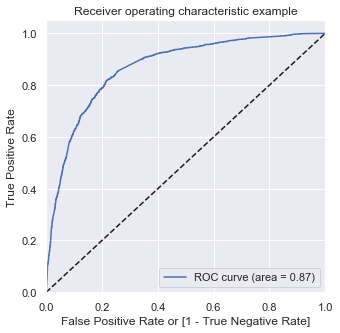

In [625]:
draw_roc(y_train_pred_final.Lead_Convertion, y_train_pred_final.Lead_Convertion_prob)

### Finding Optimal Cutoff Point

** Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [626]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Convertion_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead_Convertion,Lead_Convertion_prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.392310,7856,0,1,1,1,1,0,0,0,0,0,0
1,0,0.196244,2257,0,1,1,0,0,0,0,0,0,0,0
2,1,0.588713,851,1,1,1,1,1,1,1,0,0,0,0
3,0,0.017380,7141,0,1,0,0,0,0,0,0,0,0,0
4,0,0.195176,6337,0,1,1,0,0,0,0,0,0,0,0


In [627]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Lead_Convertion, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383913  1.000000  0.000000
0.1   0.1  0.588541  0.969660  0.351048
0.2   0.2  0.727530  0.920049  0.607563
0.3   0.3  0.790807  0.829438  0.766735
0.4   0.4  0.799307  0.760558  0.823454
0.5   0.5  0.800724  0.686757  0.871742
0.6   0.6  0.790178  0.600656  0.908278
0.7   0.7  0.759326  0.464945  0.942770
0.8   0.8  0.733827  0.366954  0.962443
0.9   0.9  0.672596  0.167692  0.987225


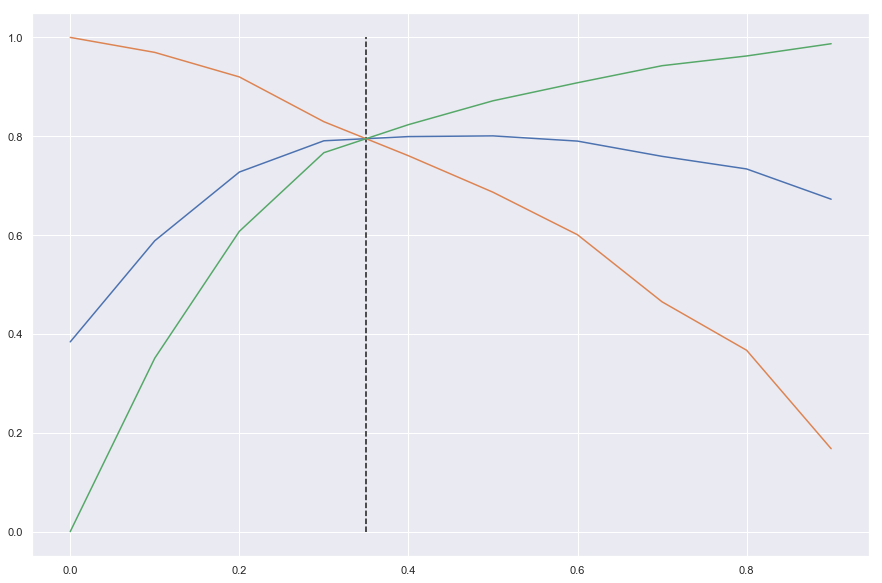

In [628]:
# Let's plot accuracy sensitivity and specificity for various probabilities.


plt.figure(figsize=[15,10])
plt.vlines(x=0.35, ymax=1.0, ymin=0.0, colors="k", linestyles="--")
plt.plot(cutoff_df['prob'], cutoff_df[['accuracy','sensi','speci']])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [629]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Convertion_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Lead_Convertion,Lead_Convertion_prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.392310,7856,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.196244,2257,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.588713,851,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.017380,7141,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.195176,6337,0,1,1,0,0,0,0,0,0,0,0,0


In [630]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Lead_Convertion, y_train_pred_final.final_predicted)

0.7955296710215646

In [631]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Lead_Convertion, y_train_pred_final.final_predicted )
confusion2

array([[3101,  813],
       [ 486, 1953]], dtype=int64)

In [632]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [633]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8007380073800738

In [634]:
# Let us calculate specificity
TN / float(TN+FP)

0.7922841083290751

In [635]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.20771589167092488


In [636]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7060737527114967


In [637]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8645107332032339


## Precision and Recall

- Looking at the confusion matrix again

In [638]:
confusion = metrics.confusion_matrix(y_train_pred_final.Lead_Convertion, y_train_pred_final.predicted )
confusion

array([[3412,  502],
       [ 764, 1675]], dtype=int64)

##### Precision or Lead Converstion Rate
TP / TP + FP

In [639]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7694074414331649

##### Recall
TP / TP + FN

In [640]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6867568675686757

Using sklearn utilities for the same

In [641]:
from sklearn.metrics import precision_score, recall_score

In [642]:
precision_score(y_train_pred_final.Lead_Convertion, y_train_pred_final.predicted)

0.7694074414331649

In [643]:
recall_score(y_train_pred_final.Lead_Convertion, y_train_pred_final.predicted)

0.6867568675686757

### Precision and recall tradeoff

In [644]:
from sklearn.metrics import precision_recall_curve

In [645]:
y_train_pred_final.Lead_Convertion, y_train_pred_final.predicted

(0       1
 1       0
 2       1
 3       0
 4       0
 5       0
 6       1
 7       0
 8       0
 9       1
 10      0
 11      0
 12      1
 13      0
 14      0
 15      0
 16      0
 17      0
 18      0
 19      0
 20      0
 21      0
 22      0
 23      1
 24      0
 25      0
 26      0
 27      0
 28      1
 29      1
        ..
 6323    0
 6324    0
 6325    0
 6326    1
 6327    1
 6328    0
 6329    0
 6330    0
 6331    1
 6332    0
 6333    1
 6334    1
 6335    1
 6336    1
 6337    0
 6338    0
 6339    0
 6340    0
 6341    1
 6342    1
 6343    0
 6344    1
 6345    0
 6346    1
 6347    1
 6348    0
 6349    1
 6350    1
 6351    0
 6352    0
 Name: Lead_Convertion, Length: 6353, dtype: int64, 0       0
 1       0
 2       1
 3       0
 4       0
 5       0
 6       1
 7       0
 8       1
 9       0
 10      0
 11      0
 12      1
 13      0
 14      0
 15      0
 16      0
 17      0
 18      1
 19      0
 20      0
 21      0
 22      0
 23      0
 24      0
 25

In [646]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Lead_Convertion, y_train_pred_final.Lead_Convertion_prob)

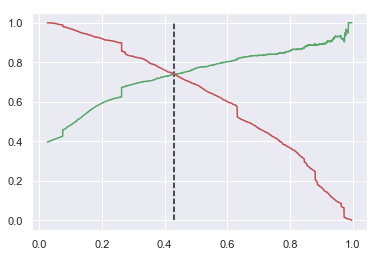

In [647]:
plt.vlines(x=0.43, ymax=1.0, ymin=0.0, colors="k", linestyles="--")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

<font color = purple> *From the curve above, `0.43` is the optimum point to take as a cutoff probability.* </font>

In [648]:
y_train_pred_final['Final_Pred_0.43'] = y_train_pred_final.Lead_Convertion_prob.map(lambda x: 1 if x > 0.43 else 0)

y_train_pred_final.head()

,Lead_Convertion,Lead_Convertion_prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Final_Pred_0.43
0,1,0.392310,7856,0,1,1,1,1,0,0,0,0,0,0,1,0
1,0,0.196244,2257,0,1,1,0,0,0,0,0,0,0,0,0,0
2,1,0.588713,851,1,1,1,1,1,1,1,0,0,0,0,1,1
3,0,0.017380,7141,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.195176,6337,0,1,1,0,0,0,0,0,0,0,0,0,0


In [649]:
# Checking the overall accuracy

metrics.accuracy_score(y_train_pred_final.Lead_Convertion, y_train_pred_final['Final_Pred_0.43'])

0.8005666614198017

In [650]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Lead_Convertion, y_train_pred_final['Final_Pred_0.43'])
confusion2

array([[3275,  639],
       [ 628, 1811]], dtype=int64)

In [651]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [652]:
# Checking the Sensitivity (aka Recall) of our logistic regression model

TP / float(TP+FN)

0.7425174251742518

In [653]:
# Checking the Specificity

TN / float(TN+FP)

0.8367399080224834

In [654]:
# Checking the false postive rate i.e. predicting conversion when customer has not converted

FP/ float(TN+FP)

0.16326009197751662

In [655]:
# Checking the positive predictive value (Precision)

TP / float(TP+FP)

0.7391836734693877

In [656]:
# Checking the negative predictive value

TN / float(TN+FN)

0.8390981296438637

### Precision and Recall

In [657]:
# Confirming Precision using sklearn

precision_score(y_train_pred_final.Lead_Convertion, y_train_pred_final['Final_Pred_0.43'])

0.7391836734693877

In [658]:
# Confirming Recall using sklearn

recall_score(y_train_pred_final.Lead_Convertion, y_train_pred_final['Final_Pred_0.43'])

0.7425174251742518

### Making predictions on the test set

In [659]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last_Activity_Email Opened,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Notable_Act_Email Opened,Last_Notable_Act_Modified,Last_Notable_Act_Others,Last_Notable_Act_Page Visited on Website,Last_Notable_Act_SMS Sent
1342,0,0,-0.704848,-0.805490,-0.655572,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8169,0,0,0.199352,-0.577417,0.803807,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1632,0,0,-0.403448,0.408449,-0.169112,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2743,0,0,-0.102048,-0.595810,0.317347,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
6133,0,0,-1.006248,-0.882741,-1.142032,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [660]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Reference,Last_Activity_Email Opened,Last_Activity_Olark Chat Conversation,Last_Activity_SMS Sent,Last_Notable_Act_Others,Last_Notable_Act_SMS Sent
1342,0,-0.704848,-0.805490,-0.655572,0,0,0,0,0,0,0,0,0,0
8169,0,0.199352,-0.577417,0.803807,0,0,1,0,0,0,0,1,0,1
1632,0,-0.403448,0.408449,-0.169112,0,0,0,0,0,0,1,0,0,0
2743,0,-0.102048,-0.595810,0.317347,0,0,1,0,0,1,0,0,0,0
6133,0,-1.006248,-0.882741,-1.142032,0,0,0,1,0,0,1,0,0,0


In [661]:
X_test_sm = sm.add_constant(X_test)

-- Making predictions on the test set

In [662]:
y_test_pred = res_final.predict(X_test_sm)

In [663]:
y_test_pred[:10]

1342    0.042306
8169    0.448254
1632    0.079822
2743    0.143526
6133    0.074996
9057    0.096701
2736    0.116225
1196    0.174160
2363    0.069515
3128    0.061917
dtype: float64

In [664]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [665]:
# Let's see the head
y_pred_1.head()

,0
1342,0.042306
8169,0.448254
1632,0.079822
2743,0.143526
6133,0.074996


In [666]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [667]:
# Adding LeadID to index
y_test_df['LeadID'] = y_test_df.index

In [668]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [669]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [670]:
y_pred_final.head()

,Converted,LeadID,0
0,1,1342,0.042306
1,0,8169,0.448254
2,0,1632,0.079822
3,0,2743,0.143526
4,0,6133,0.074996


In [671]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Prob'})

In [672]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['LeadID','Converted','Lead_Prob'], axis=1)

In [673]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Lead_Prob
0,1342,1,0.042306
1,8169,0,0.448254
2,1632,0,0.079822
3,2743,0,0.143526
4,6133,0,0.074996


#### Evaluation with optimal cutoff 0.37

In [674]:
y_pred_final['final_predicted'] = y_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [675]:
y_pred_final.head()

,LeadID,Converted,Lead_Prob,final_predicted
0,1342,1,0.042306,0
1,8169,0,0.448254,1
2,1632,0,0.079822,0
3,2743,0,0.143526,0
4,6133,0,0.074996,0


In [676]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7944199706314243

In [677]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1376,  333],
       [ 227,  788]], dtype=int64)

In [678]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [679]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7763546798029557

In [680]:
# Let us calculate specificity
TN / float(TN+FP)

0.8051492100643651

In [681]:
# Checking the positive predictive value (aka Precision)

TP / float(TP+FP)

0.7029438001784122

#### Model evaluation using `0.43` as the cutoff probability

In [682]:
y_pred_final['Final_Pred_0.43'] = y_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.43 else 0)

In [683]:
y_pred_final.head()

,LeadID,Converted,Lead_Prob,final_predicted,Final_Pred_0.43
0,1342,1,0.042306,0,0
1,8169,0,0.448254,1,1
2,1632,0,0.079822,0,0
3,2743,0,0.143526,0,0
4,6133,0,0.074996,0,0


In [684]:
# Checking the overall accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final['Final_Pred_0.43'])

0.7980910425844346

In [685]:
# Checking the overall accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final['Final_Pred_0.43'])

0.7980910425844346

In [686]:
confusion4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final['Final_Pred_0.43'])
confusion4

array([[1431,  278],
       [ 272,  743]], dtype=int64)

In [687]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [688]:
# Checking the Sensitivity (or Recall) of our logistic regression model

TP / float(TP+FN)

0.7320197044334975

In [689]:
# Checking the Specificity

TN / float(TN+FP)

0.8373317729666472

#### Lead Convertion rate

In [690]:
# Checking the positive predictive value (or Precision)

TP / float(TP+FP)

0.7277179236043095

<font color = Blue> *Our train and test model evaluation metrics(Accuracy, Sensitivity & Specificity) are fairly similar so we'll consider this our final model and proceed in identifying the most promising leads as well as the most important features.* </font>

### Assigning Lead Scores

In [691]:
# Creating a column for lead scores

y_train_pred_final['Lead_Score_Train'] = round(y_train_pred_final['Lead_Convertion_prob'] * 100)
y_pred_final['Lead_Score_Test'] = round(y_pred_final['Lead_Prob'] * 100)

In [692]:
y_train_pred_final.head()

,Lead_Convertion,Lead_Convertion_prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Final_Pred_0.43,Lead_Score_Train
0,1,0.392310,7856,0,1,1,1,1,0,0,0,0,0,0,1,0,39.0
1,0,0.196244,2257,0,1,1,0,0,0,0,0,0,0,0,0,0,20.0
2,1,0.588713,851,1,1,1,1,1,1,1,0,0,0,0,1,1,59.0
3,0,0.017380,7141,0,1,0,0,0,0,0,0,0,0,0,0,0,2.0
4,0,0.195176,6337,0,1,1,0,0,0,0,0,0,0,0,0,0,20.0


In [693]:
# Test final predicted df
y_pred_final.head()

,LeadID,Converted,Lead_Prob,final_predicted,Final_Pred_0.43,Lead_Score_Test
0,1342,1,0.042306,0,0,4.0
1,8169,0,0.448254,1,1,45.0
2,1632,0,0.079822,0,0,8.0
3,2743,0,0.143526,0,0,14.0
4,6133,0,0.074996,0,0,7.0


In [694]:
# Assigning lead scores calcualted from train and test data to appropriate leads in the original dataframe

Lead_scores_train = pd.concat([df_new['Lead Number'], X_train, y_train_pred_final], join='inner', axis=1)
Lead_scores_test = pd.concat([df_new['Lead Number'], X_test, y_pred_final], join='inner', axis=1)

In [695]:
Lead_scores_train.sort_values(by='Lead_Score_Train', ascending=False)

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Final_Pred_0.43,Lead_Score_Train
421,655916,0,0,-0.102048,-0.494648,0.317347,0,0,0,0,...,1,1,1,1,1,1,1,1,1,100.0
2928,631621,0,0,-0.403448,-0.069769,-0.169112,0,0,0,0,...,1,1,1,1,1,1,1,1,1,100.0
1244,646701,0,0,-1.006248,-0.882741,-1.142032,0,0,0,0,...,1,1,1,1,1,1,1,1,1,100.0
2768,633105,0,0,-1.006248,-0.882741,-1.142032,0,0,0,0,...,1,1,1,1,1,1,1,1,1,100.0
684,653510,1,0,0.199352,0.660434,0.803807,0,0,0,0,...,1,1,1,1,1,1,1,1,1,100.0
343,656776,0,0,1.103551,-0.777900,-0.008581,0,0,0,0,...,1,1,1,1,1,1,1,1,1,99.0
1532,644118,0,0,-1.006248,-0.882741,-1.142032,0,0,0,0,...,1,1,1,1,1,1,1,1,1,99.0
3682,624838,1,0,-0.704848,-0.744793,-0.655572,0,0,0,0,...,1,1,1,1,1,1,1,1,1,99.0
1321,645948,0,0,2.911950,-0.415558,0.438962,0,0,0,0,...,1,1,1,1,1,1,1,1,1,99.0
4515,616420,0,0,-0.102048,-0.167252,0.317347,0,0,0,0,...,1,1,1,1,1,1,1,1,1,99.0


In [696]:
Lead_scores_test.sort_values(by='Lead_Score_Test', ascending=False)

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Reference,...,Last_Activity_Olark Chat Conversation,Last_Activity_SMS Sent,Last_Notable_Act_Others,Last_Notable_Act_SMS Sent,LeadID,Converted,Lead_Prob,final_predicted,Final_Pred_0.43,Lead_Score_Test
298,657261,0,0.500752,-0.415558,-0.533957,0,0,0,0,0,...,0,0,0,0,2594,1,0.997488,1,1,100.0
669,653635,0,2.309151,1.339136,0.643276,0,0,0,0,0,...,0,0,0,0,739,1,0.996191,1,1,100.0
1868,641424,0,0.199352,-0.229789,0.803807,0,0,1,0,0,...,0,0,0,0,2010,1,0.975546,1,1,98.0
313,657101,0,0.802152,-0.112073,1.776727,0,0,0,0,0,...,0,0,0,0,8499,1,0.972589,1,1,97.0
1795,642018,0,1.103551,-0.868026,2.263187,0,0,1,0,0,...,0,1,0,0,3095,1,0.966845,1,1,97.0
1783,642088,0,-1.006248,-0.882741,-1.142032,0,1,0,0,1,...,0,0,0,0,8204,0,0.972589,1,1,97.0
570,654352,0,0.500752,-0.130466,1.290267,0,0,1,0,0,...,0,0,0,0,3069,1,0.972589,1,1,97.0
1002,649426,0,-0.403448,-0.748472,-0.655572,0,0,0,0,0,...,1,0,0,0,8146,1,0.973189,1,1,97.0
100,659492,0,1.103551,2.120839,0.560577,0,0,0,0,1,...,0,0,0,0,2672,1,0.972589,1,1,97.0
1610,643508,0,0.199352,-0.117591,0.803807,0,0,1,0,0,...,0,1,0,0,4782,1,0.972589,1,1,97.0


## List of Hot Leads

In [697]:
#  Train - Hot Leads


Lead_scores_train[Lead_scores_train['Lead_Score_Train'] >=80 ]['Lead Number'].to_frame()


,Lead Number
18,660522
34,660333
46,660174
60,659931
63,659896
66,659853
68,659833
71,659820
82,659704
84,659696


In [698]:
#  Count or Number of Train - Hot Leads


Lead_scores_train[Lead_scores_train['Lead_Score_Train'] >=80 ]['Lead Number'].to_frame().count()


Lead Number    723
dtype: int64

In [699]:
# Hot Leads - Test

Lead_scores_test[Lead_scores_test['Lead_Score_Test'] >= 80]['Lead Number'].to_frame()

,Lead Number
30,660402
42,660215
76,659727
97,659545
100,659492
184,658606
248,657828
251,657803
259,657691
292,657316


In [700]:
# Hot Leads - Test

Lead_scores_test[Lead_scores_test['Lead_Score_Test'] >= 80]['Lead Number'].to_frame().count()

Lead Number    143
dtype: int64

#### The above are the list of Customers having a lead score > 80 which means they are most promising leads that are most likely to turn into paying Customers. From the testing data set we have 143 hot leads likely to turn out as paying customers.

## Find the Important Features 

In [701]:
## Based on the final Model stats the absolute values of co-effecients of the features are sorted in decending order.
abs(res_final.params).sort_values(ascending=False)

Lead Origin_Lead Import                  4.076426
Through Recommendations                  2.298623
const                                    2.133899
Last_Notable_Act_Others                  1.978176
Do Not Email                             1.522535
Last_Notable_Act_SMS Sent                1.509323
Lead Source_Olark Chat                   1.342739
Total Time Spent on Website              1.110312
Last_Activity_SMS Sent                   0.880537
Last_Activity_Email Opened               0.820058
Last_Activity_Olark Chat Conversation    0.661363
TotalVisits                              0.358478
Lead Source_Google                       0.303738
Lead Source_Reference                    0.296465
Page Views Per Visit                     0.246053
dtype: float64

In [702]:
top_features = pd.DataFrame(res_final.params.sort_values(ascending=False),columns = ['Coeffs'])

In [703]:
top_features.index.names = ['Features']
top_features

,Coeffs
Features,
Lead Origin_Lead Import,4.076426
Through Recommendations,2.298623
Last_Notable_Act_Others,1.978176
Last_Notable_Act_SMS Sent,1.509323
Lead Source_Olark Chat,1.342739
Total Time Spent on Website,1.110312
Last_Activity_SMS Sent,0.880537
Last_Activity_Email Opened,0.820058
TotalVisits,0.358478


#### The top three variables which contribute most towards the probability of a lead getting converted

** Based on the business logic the most important parameters to be considered are

1. Total Time Spent on Website
2. Through Recommendations
3. TotalVisits


#### The top three categorical/dummy variables based on the business logic to be focused in order to increase the probability of lead conversion

1. Lead Origin_Lead Import
2. Last_Notable_Act_SMS Sent
3. Lead Source_Olark Chat

## End of Case Study